In [101]:
#Biblotheken
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
from scipy.interpolate import interp1d

In [31]:
#Makroparamter für Plots
plt.rcParams.update({'font.size': 18})
plt.style.use(['science', 'bright'])

# j-V-Kennlinien

In [50]:
d = 7.0

In [51]:
area = np.pi*(0.5*d)**2 

zur Umrechnung in Stromdichte
gewählte einheit: mA/mm

In [53]:
dunkelKL = pd.read_csv("data/Kennlinienmessung/P2dunkel.dat", sep=';', names=["U","I","del"], index_col = False)
dunkelKL['U'] = -dunkelKL['U']
dunkelKL['I'] = dunkelKL["I"]*1E3/area

hellKL = pd.read_csv("data/Kennlinienmessung/P2hell.dat", sep=' ', names=["U","I","del"], index_col = False)
hellKL['U'] = -hellKL['U']
hellKL['I'] = hellKL["I"]*1E3/area

KL80 = pd.read_csv("data/Kennlinienmessung/P2_80.dat", sep=' ', names=["U","I","del"], index_col = False)
KL80['U'] = -KL80['U']
KL80['I'] = KL80["I"]*1E3/area

KL50 = pd.read_csv("data/Kennlinienmessung/P2_50.dat", sep=' ', names=["U","I","del"], index_col = False)
KL50['U'] = -KL50['U']
KL50['I'] = KL50["I"]*1E3/area

KL10 = pd.read_csv("data/Kennlinienmessung/P2_10.dat", sep=' ', names=["U","I","del"], index_col = False)
KL10['U'] = -KL10['U']
KL10['I'] = KL10["I"]*1E3/area

KL1 = pd.read_csv("data/Kennlinienmessung/P2_1.dat", sep=' ', names=["U","I","del"], index_col = False)
KL1['U'] = -KL1['U']
KL1['I'] = KL1["I"]*1E3/area

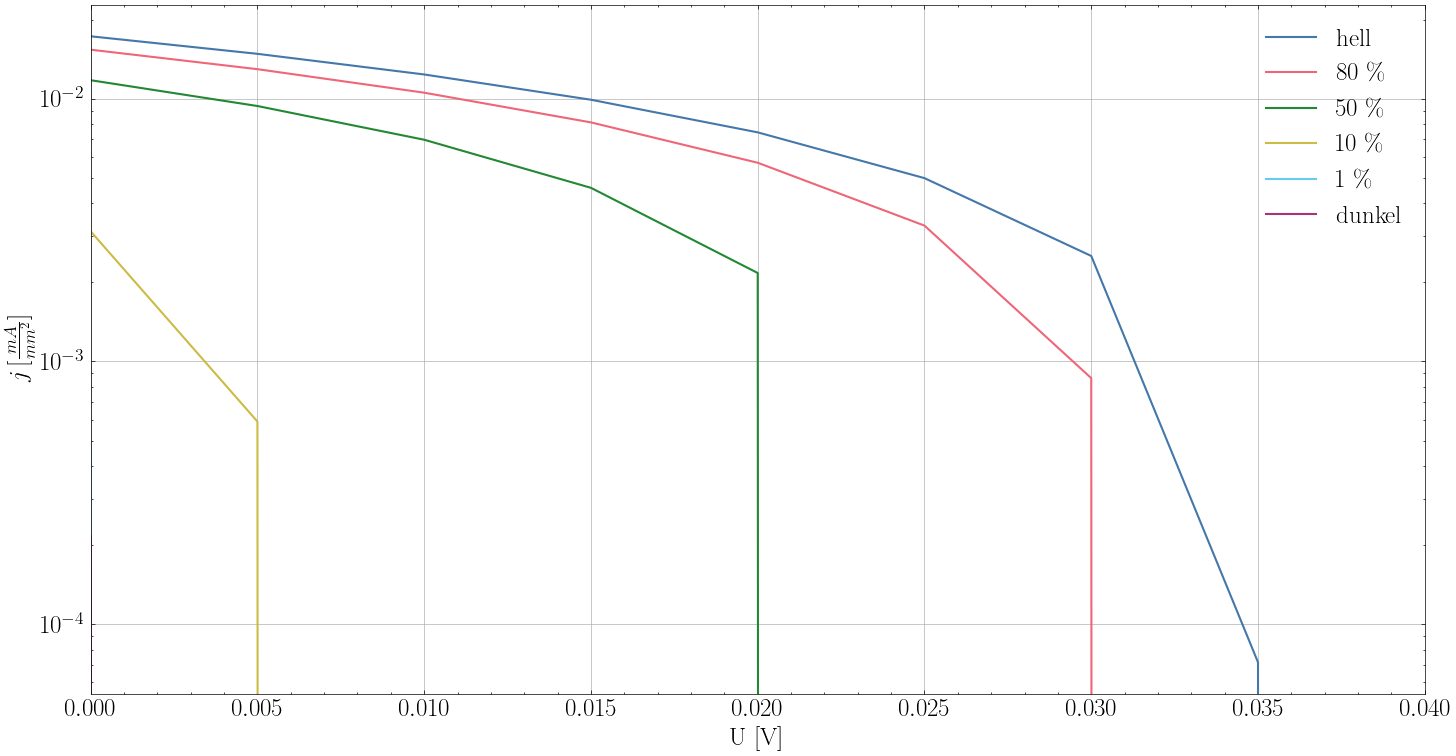

In [119]:
fig = plt.figure(figsize=[15,8], dpi=100)
ax = fig.add_subplot(111)


ax.plot(hellKL.U, hellKL.I, linewidth = 1.5, label = "hell")
ax.plot(KL80.U, KL80.I, linewidth = 1.5, label = r"80 \%")
ax.plot(KL50.U, KL50.I, linewidth = 1.5, label = r"50 \%")
ax.plot(KL10.U, KL10.I, linewidth = 1.5, label = r"10 \%")
ax.plot(KL1.U, KL1.I, linewidth = 1.5, label = r"1 \%")
ax.plot(dunkelKL.U, dunkelKL.I, linewidth = 1.5, label = "dunkel")

ax.axhline(0,color = "black")

ax.set_xlim(xmin = 0, xmax = 0.04)
#ax.set_ylim(ymin = -0.01)


ax.set_xlabel("U [V]")
ax.set_ylabel(ylabel=r"$j \, [\frac{mA}{mm^2}]$")

ax.set_yscale("log")

ax.legend()
ax.grid()

plt.tight_layout()

plt.savefig("bilder/KennlinienLOG.pdf")

In [111]:
#Kurzschlusströme und Leerlaufspannungen, Achtung Stromdichten !
print("Hell:  I_SC: ",hellKL.I[0], "U_OC: ", interp1d(hellKL.I, hellKL.U, kind='linear', fill_value="extrapolate")(0.0))
print("dunkel:  I_SC: ",KL80.I[0], "U_OC: ", interp1d(KL80.I, KL80.U, kind='linear', fill_value="extrapolate")(0.0))
print("80:  I_SC: ",KL50.I[0], "U_OC: ", interp1d(KL50.I, KL50.U, kind='linear', fill_value="extrapolate")(0.0))
print("50:  I_SC: ",KL10.I[0], "U_OC: ", interp1d(KL10.I, KL10.U, kind='linear', fill_value="extrapolate")(0.0))
print("10:  I_SC: ",KL1.I[0], "U_OC: ", interp1d(KL1.I, KL1.U, kind='linear', fill_value="extrapolate")(0.0))
print("1:  I_SC: ",dunkelKL.I[0], "U_OC: ", interp1d(dunkelKL.I, dunkelKL.U, kind='linear', fill_value="extrapolate")(0.0))

Hell:  I_SC:  0.017287734724647983 U_OC:  0.035145662683058965
dunkel:  I_SC:  0.015373042294171347 U_OC:  0.031787022914711784
80:  I_SC:  0.011764889300235934 U_OC:  0.024490848787962465
50:  I_SC:  0.0031286613751803525 U_OC:  0.006166930948497907
10:  I_SC:  0.00047786758872351046 U_OC:  0.0008932318279135376
1:  I_SC:  0.00021640836790175484 U_OC:  0.0004032981231490299


In [107]:
interp1d(hellKL.I, hellKL.U, kind='linear', fill_value="extrapolate")(0.0)

array(0.03514566)